# Task Definition

* 주어진 데이터를 갖고 네트워크 칩입을 감지하는 Classfication Model을 설계하라.

* 주어진 데이터를 가공하고, 수정하여도 무관하다.

* 사용해 볼 수 있는 만큼 많은 모델을 시도하여 볼 것

* 사용한 모델은 모두 Jupyter Notebook에 남길 것 (채점할 때 실행 가능하도록)

* 보고서는 따로 워드로 제출할 것 (보고서 양식은 따로 없음)

# Data Description

해당 데이터는 KDD Cup 1999 Dataset을 가공한 네트워크 칩입 감지 시스템용 데이터이다. 각 Feature들은 어떤 protocol type을 사용하는 지 혹은 어떤 service를 사용하는 지 등의 내용를 담고 있다. Class는 현재 네트워크가 침입을 당한 상태인 지 만약 침입을 당하였다면 어떤 종류의 침입을 당했는 지를 나타낸다.

# Feature Description

## Total 41 Features.

duration: continuous.

protocol_type: symbolic.

service: Numeric, categorical

flag: Numeric, categorical

src_bytes: continuous.

dst_bytes: continuous.

land: symbolic.

wrong_fragment: continuous.

urgent: continuous.

hot: continuous.

num_failed_logins: continuous.

logged_in: symbolic.

num_compromised: continuous.

root_shell: continuous.

su_attempted: continuous.

num_root: continuous.

num_file_creations: continuous.

num_shells: continuous.

num_access_files: continuous.

num_outbound_cmds: continuous.

is_host_login: symbolic.

is_guest_login: symbolic.

count: continuous.

srv_count: continuous.

serror_rate: continuous.

srv_serror_rate: continuous.

rerror_rate: continuous.

srv_rerror_rate: continuous.

same_srv_rate: continuous.

diff_srv_rate: continuous.

srv_diff_host_rate: continuous.

dst_host_count: continuous.

dst_host_srv_count: continuous.

dst_host_same_srv_rate: continuous.

dst_host_diff_srv_rate: continuous.

dst_host_same_src_port_rate: continuous.

dst_host_srv_diff_host_rate: continuous.

dst_host_serror_rate: continuous.

dst_host_srv_serror_rate: continuous.

dst_host_rerror_rate: continuous.

dst_host_srv_rerror_rate: continuous.

보다 자세한 설명은 http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html 를 참조(가공된 데이터이기 때문에, 사이트와 다른 점이 있음을 염두할것.)

# Class Description

"Normal", "dos", "u2r", "r2l", "probe" 5개의 Class가 존재한다.

Normal은 정상을 의미하며, 나머지 4개는 네트워크상 침입 기법들의 이름들이다.

# Pandas로 데이터 불러오기

In [1]:
import pandas as pd

train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('test_data.csv')

In [2]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,50,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
6,0,icmp,50,4,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
7,0,icmp,50,4,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos
8,0,icmp,52,4,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
9,0,icmp,50,4,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,dos


In [3]:
#test data에 있던 의미없는 column을 지운다.
test_data = test_data.iloc[:,1:]

In [4]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal
5,0,icmp,25,2,304,16414,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
6,0,icmp,29,3,0,44,0,0,0,0,...,54,0.21,0.02,0.00,0.00,0.00,0.00,0.78,0.98,probe
7,0,icmp,25,5,42340,7300,0,0,0,1,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.07,0.07,dos
8,4,icmp,48,2,32,93,0,0,0,0,...,124,0.87,0.02,0.01,0.02,0.00,0.00,0.07,0.00,r2l
9,0,icmp,25,2,249,5656,0,0,0,0,...,242,1.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,normal


# Data Preprocessing

<h3> 중복 데이터 제거 </h3>

Train Set과 Test Set에 있는 중복된 데이터를 제거합니다.

In [5]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()

<h3> Missing Value Check</h3>

Train Set과 Test Set에 missing value가 있는 지 확인합니다.

In [6]:
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

False
False


<h3> 데이터 분포 </h3>

describe 함수를 사용해서 데이터의 전반적인 분포를 확인합니다.

In [7]:
train_data.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125941.000000,125941.000000,125941.000000,1.259410e+05,1.259410e+05,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000,...,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000,125941.000000
mean,287.217610,32.088359,2.574936,4.557832e+04,1.978414e+04,0.000199,0.022693,0.000111,0.204461,0.001223,...,182.148514,115.680636,0.521297,0.082923,0.148305,0.032551,0.284366,0.278396,0.118838,0.120247
std,2604.842156,16.462601,1.141428,5.871077e+06,4.021780e+06,0.014088,0.253562,0.014368,2.150239,0.045245,...,99.202242,110.703183,0.448940,0.188856,0.308901,0.112577,0.444740,0.445625,0.306561,0.319466
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,2.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,4.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,70.000000,11.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
test_data.describe()

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,9999.000000,9999.000000,9999.000000,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.00000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,229.285929,35.450745,2.203020,6.845716e+03,1.997198e+03,0.000500,0.009001,0.00060,0.093209,0.021202,...,194.516152,139.659566,0.605830,0.089321,0.133180,0.020104,0.096215,0.097791,0.236223,0.230104
std,1461.251867,15.825272,1.078527,8.675840e+04,2.007074e+04,0.022357,0.146708,0.03162,0.647763,0.148845,...,93.748802,111.545514,0.436258,0.218011,0.307166,0.089357,0.271331,0.279663,0.389087,0.403241
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,...,125.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,2.000000,5.400000e+01,4.400000e+01,0.000000,0.000000,0.00000,0.000000,0.000000,...,255.000000,160.000000,0.910000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,50.000000,2.000000,2.850000e+02,5.990000e+02,0.000000,0.000000,0.00000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.390000,0.220000
max,57715.000000,70.000000,11.000000,6.291668e+06,1.285078e+06,1.000000,3.000000,2.00000,30.000000,3.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


train_data와 Test_Data를 Feature와 Column으로 나눕니다.

In [9]:
train_X = train_data.iloc[:,:-1]
train_y = train_data.iloc[:,-1]

test_X = test_data.iloc[:,:-1]
test_y = test_data.iloc[:,-1]

In [10]:
train_X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,icmp,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,icmp,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,icmp,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,icmp,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,icmp,50,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,icmp,50,4,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,icmp,50,4,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,icmp,52,4,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,icmp,50,4,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [11]:
train_y

0         normal
1         normal
2            dos
3         normal
4         normal
5            dos
6            dos
7            dos
8            dos
9            dos
10           dos
11           dos
12        normal
13           r2l
14           dos
15           dos
16        normal
17         probe
18        normal
19        normal
20           dos
21           dos
22        normal
23        normal
24           dos
25        normal
26           dos
27        normal
28        normal
29        normal
           ...  
125943    normal
125944    normal
125945    normal
125946       dos
125947     probe
125948       dos
125949    normal
125950       dos
125951    normal
125952    normal
125953       dos
125954    normal
125955    normal
125956    normal
125957    normal
125958       dos
125959    normal
125960    normal
125961    normal
125962    normal
125963    normal
125964       dos
125965    normal
125966       dos
125967    normal
125968       dos
125969    normal
125970    norm

<h3>Label Encoding & Onehot Encoding</h3>

Feature 중에 protocol_type은 Categorical data로 Numerical하게 처리해 줄 수 없습니다.<br />

Label Encoding을 한다면 0 : icmp, 1 : tcp, 2 : udp로 인코딩이 됩니다.<br />

인코딩 된 결과에서 0와 2의 중간은 1, 즉 icmp와 udp의 중간은 tcp다 라는 것을 내포하게 되는 데,<br />

이는 맞지 않기 때문에 get_dummies 함수를 이용해서 Label Encoding이 아닌 Onehot Encoding을 적용했습니다.

In [12]:
encoded_train_X = pd.concat([train_X, pd.get_dummies(train_data['protocol_type'])], axis=1)
X_test = pd.concat([test_X, pd.get_dummies(test_data['protocol_type'])], axis=1)

encoded_train_X.drop('protocol_type', axis=1, inplace=True)
X_test.drop('protocol_type', axis=1, inplace=True)

target data도 위와 마찬가지로 Onehot Encoding을 적용합니다.<br />

Onehot encoding을 하기 전에는 먼저 Label Encoding부터 수행해야 됩니다

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()

encoded_y_train = le.fit_transform(train_y)
encoded_y_test = le.fit_transform(test_y)

ohe = OneHotEncoder()

y_train = ohe.fit_transform(encoded_y_train.reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(encoded_y_test.reshape(-1, 1)).toarray()

<h3>Normalization</h3>

Normalization을 수행합니다.

In [14]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

normalizer.fit(encoded_train_X)

X_train = normalizer.transform(encoded_train_X)
X_test = normalizer.transform(X_test)

<h3>그래프</h3>

데이터의 각 column 값과 target 값의 경향성을 파악하기 위해 scatter plot을 그립니다.

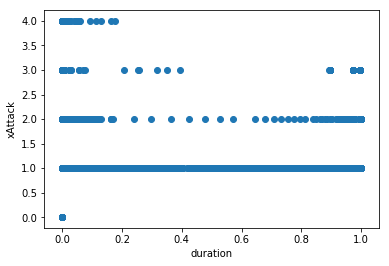

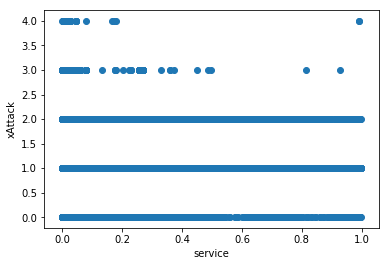

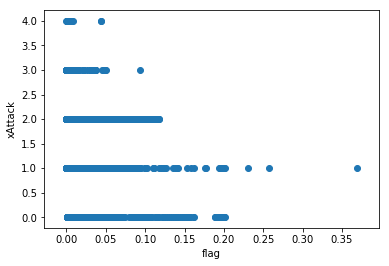

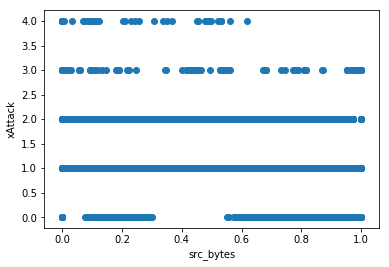

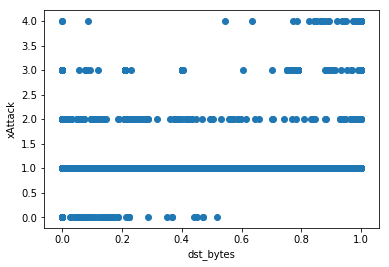

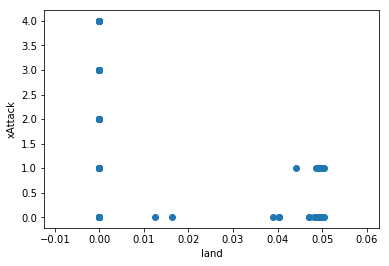

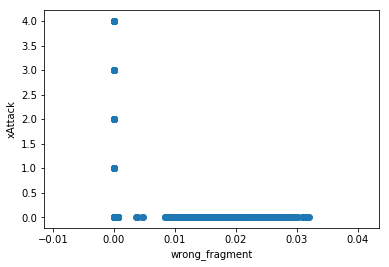

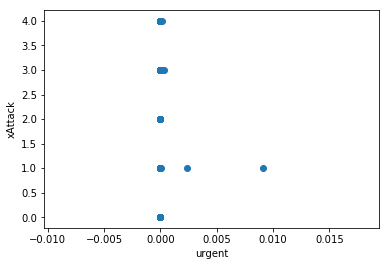

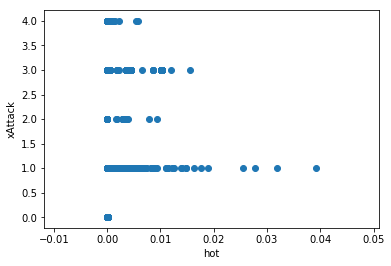

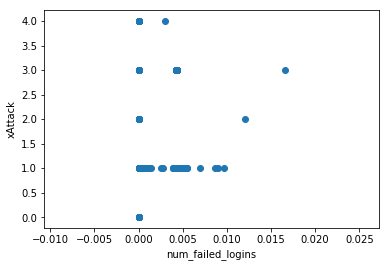

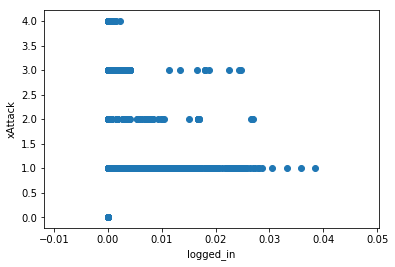

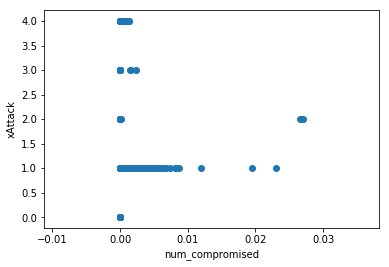

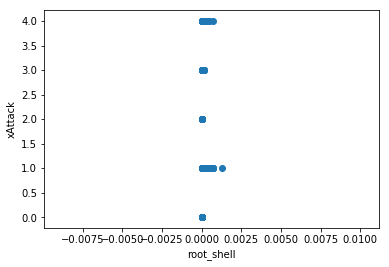

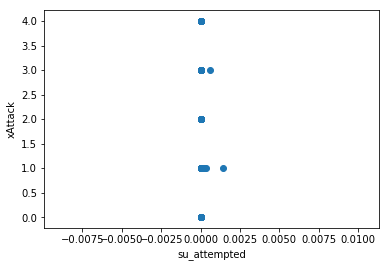

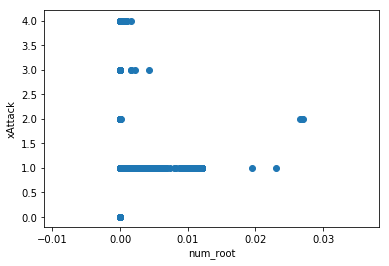

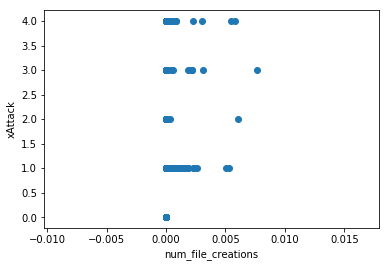

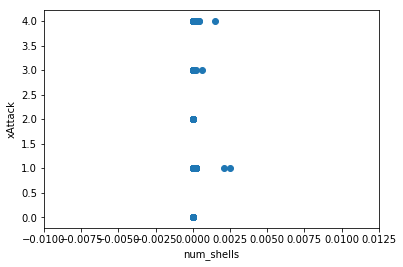

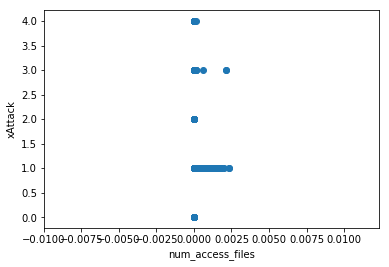

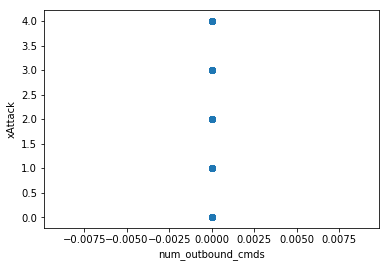

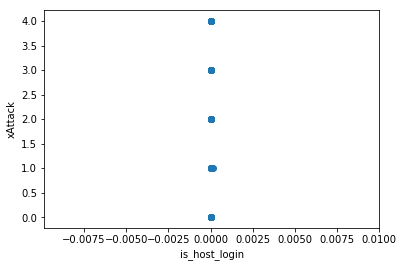

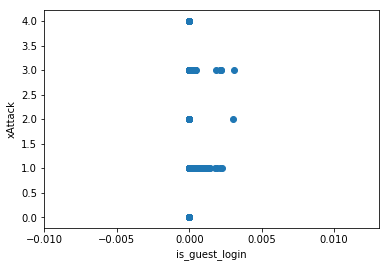

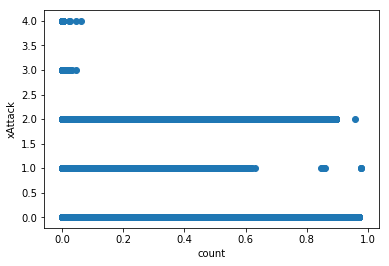

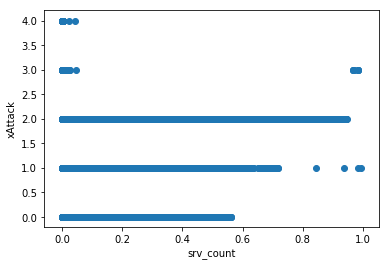

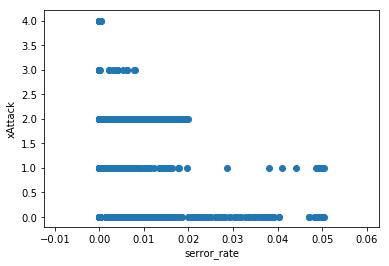

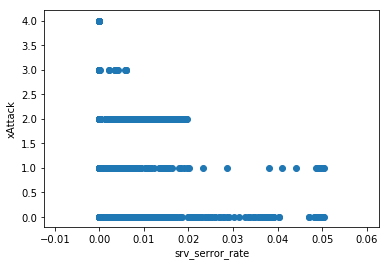

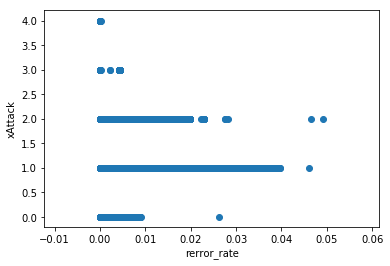

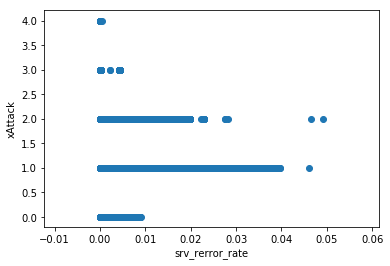

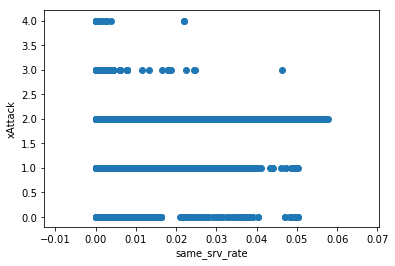

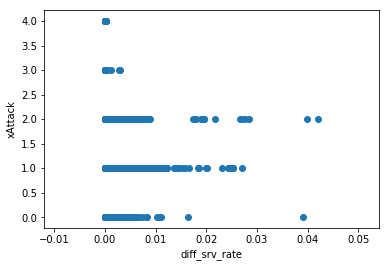

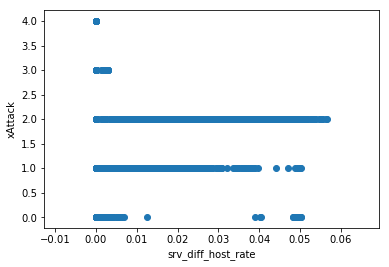

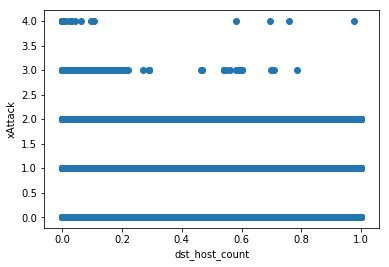

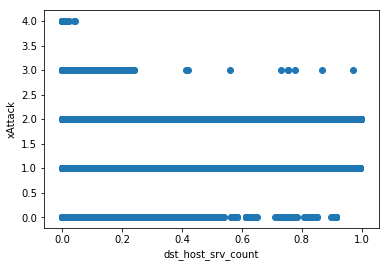

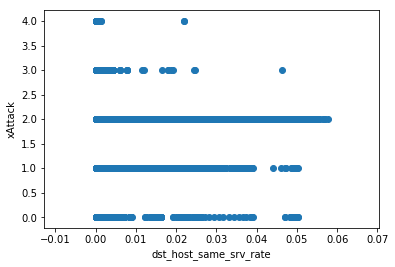

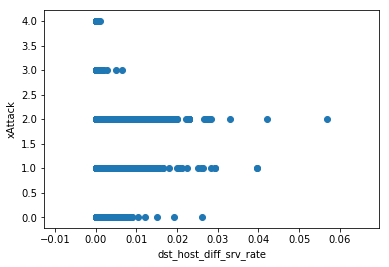

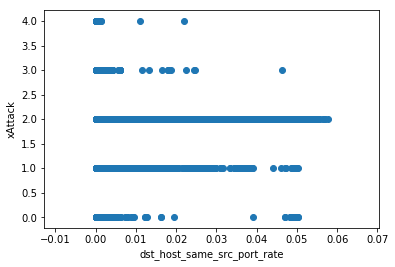

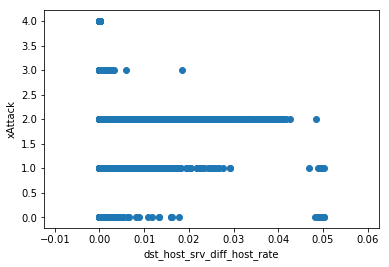

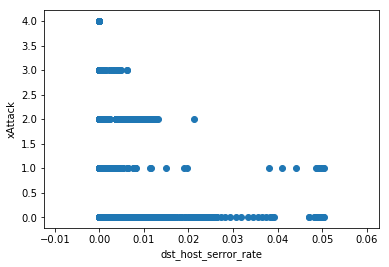

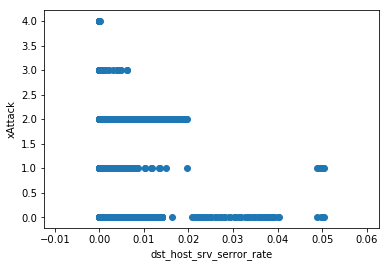

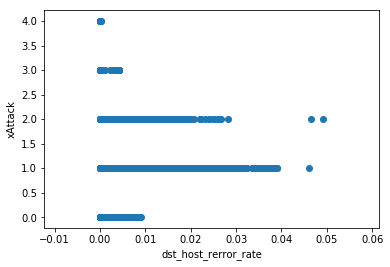

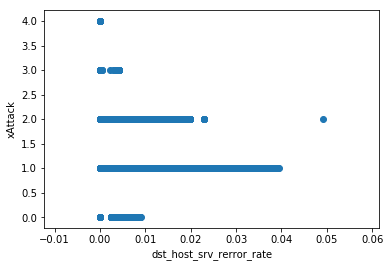

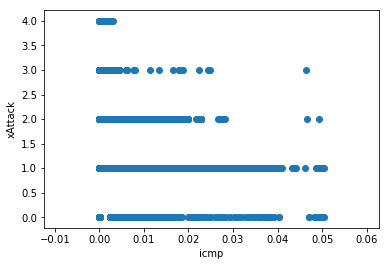

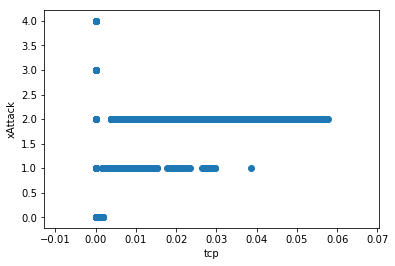

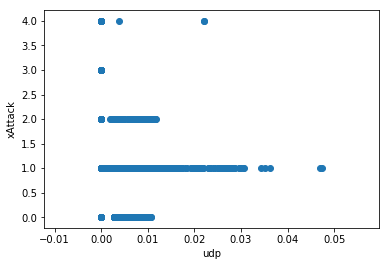

In [15]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

r,c = X_train.shape
columns = encoded_train_X.columns

for j in range(c) :
    plt.figure()
    plt.xlabel(columns[j])
    plt.ylabel('xAttack')
    plt.scatter(X_train[:,j], encoded_y_train)
    plt.show()

# Model Selection

<h3>1. KNN Classifier</h3>

Instance based Model인 KNN Classifier 입니다.<br />
K는 기본적으로 3으로 설정되어 있습니다.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

knc.fit(X_train, y_train)

print('Train Prediction : %.2f' % knc.score(X_train, y_train))
print('Test Prediction : %.2f' % knc.score(X_test, y_test))

Train Prediction : 0.99
Test Prediction : 0.75


<h3>2. Random Forest</h3>

Ensemble Method 중 Randomization이 구현된 Random Forest Model 입니다.

In [17]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
    
random_forest.fit(X_train, y_train)
    
print('Train Prediction : %.2f' % random_forest.score(X_train, y_train))
print('Test Prediction : %.2f' % random_forest.score(X_test, y_test))

Train Prediction : 1.00
Test Prediction : 0.73


<h3>3. Multi-Layer Perceptron</h3>


In [18]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(X_train, y_train)
    
print('Train Prediction : %.2f' % mlp.score(X_train, y_train))
print('Test Prediction : %.2f' % mlp.score(X_test, y_test))

Train Prediction : 0.99
Test Prediction : 0.74


<h3>4. AdaBoostClassifier</h3>

Ensemble Method 중 Boosting Method를 이용해서 Classification을 수행합니다.

In [19]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

abc.fit(X_train, encoded_y_train)
    
print('Train Prediction : %.2f' % abc.score(X_train, encoded_y_train))
print('Test Prediction : %.2f' % abc.score(X_test, encoded_y_test))

Train Prediction : 0.85
Test Prediction : 0.68


<h3>5. Logistic Regression</h3>

Single Line을 이용해서 Classification을 수행합니다.

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag', multi_class='multinomial')

lr.fit(X_train, encoded_y_train)
    
print('Train Prediction : %.2f' % lr.score(X_train, encoded_y_train))
print('Test Prediction : %.2f' % lr.score(X_test, encoded_y_test))

Train Prediction : 0.91
Test Prediction : 0.64


<h3>6. Naive Bayes</h3>

확률을 기반으로 Classification을 하는 모델 입니다.

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, encoded_y_train)
    
print('Train Prediction : %.2f' % nb.score(X_train, encoded_y_train))
print('Test Prediction : %.2f' % nb.score(X_test, encoded_y_test))

Train Prediction : 0.59
Test Prediction : 0.49


# 7. Deep Learning Model

pytorch를 이용해서 MLP model을 구현했습니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

model = nn.Sequential(
        nn.Linear(43, 200),
        nn.ReLU(inplace=True),
        nn.BatchNorm1d(200),
    
        nn.Linear(200, 200),
        nn.ReLU(inplace=True),
        nn.BatchNorm1d(200),

        nn.Linear(200, 200),
        nn.ReLU(inplace=True),
        nn.BatchNorm1d(200),

        nn.Linear(200, 5),
        )

dtype = torch.cuda.FloatTensor

X_train_var = Variable(torch.from_numpy(X_train).type(dtype)).type(dtype)
y_train_var = Variable(torch.from_numpy(encoded_y_train).type(dtype)).type(torch.cuda.LongTensor)

X_test_var = Variable(torch.from_numpy(X_test).type(dtype)).type(dtype)
y_test_var = Variable(torch.from_numpy(encoded_y_test).type(dtype)).type(torch.cuda.LongTensor)

model_gpu = model.type(dtype)
criterion = nn.CrossEntropyLoss().type(dtype)
optimizer = optim.Adam(model_gpu.parameters())

for i in range(1000) : 
    scores = model_gpu(X_train_var)
    loss = criterion(scores, y_train_var)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
        
outputs = model_gpu(X_train_var)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted.cpu() == y_train_var.data.cpu()).sum()

print('Train Prediction : %.2f' % (correct / X_train_var.size(0)))

outputs = model_gpu(X_test_var)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted.cpu() == y_test_var.data.cpu()).sum()

print('Test Prediction : %.2f' % (correct / X_test_var.size(0)))

# Final Model

<h3>8. Decision Tree</h3>

In [53]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, min_samples_leaf=3, min_samples_split=3, max_features='sqrt')

decision_tree.fit(X_train, y_train)

print('Train Prediction : %.2f' % decision_tree.score(X_train, y_train))
print('Test Prediction : %.2f' % decision_tree.score(X_test, y_test))

Train Prediction : 1.00
Test Prediction : 0.76


<h3>K Fold</h3>

테스트 결과의 Variation을 줄이기 위해 데이터 셋을 나눠 k번 학습을 시키고 평균을 구합니다.

In [23]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True)

<h3>HyperParmeter Tunning</h3>

모델의 좋은 Hyper parameter를 고르기 위해 tunning을 시도합니다.

In [25]:
from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()

param_grid = {'max_depth' : [25, 30, 35], 'max_features' : ['sqrt', 'log2', None], 'min_samples_leaf' : [3, 4, 5], 'min_samples_split' : [2, 3, 4]}

gs = GridSearchCV(decision_tree, param_grid, cv=kf)

gs.fit(X_train, y_train)

best_estimator = gs.best_estimator_

KeyboardInterrupt: 

In [ ]:
gs.best_params_

In [ ]:
print('Train Prediction : %.2f' % best_estimator.score(X_train, y_train))
print('Test Prediction : %.2f' % best_estimator.score(X_test, y_test))

# Model Evaluation

<h2>Learning Curve</h2>

Training과 Test의 결과를 보고 overfitting 되었는지 underfitting 되었는지 확인합니다.

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(best_estimator, X_train, y_train)

In [ ]:
from sklearn_evaluation import plot

In [ ]:
plot.learning_curve(train_scores, valid_scores, train_sizes)